# Actividad 5: Tarea de clasificación y evaluación (Versión 2 - alterna)
Aprendizaje Automático

Especialización en Inteligencia Artificial

Universidad Autónoma de Manizales

2024

En los problemas a continuación, siga las instrucciones y responda las preguntas. Para las celdas de código, implemente la porción de la solución que indican los comentarios en la celda.

In [119]:
#importar pandas y numpy

import pandas as pd
import numpy as np

**La solución a los puntos siguientes debe desarrollarse utilizando únicamente pandas y numpy. No se permite utilizar otra librería como Scikit learn, a menos que se indique lo contrario.**

## Problema 1 - Obtener y preparar los datos
Cargue el conjunto de datos del Titanic (_titanic.csv_) en una variable de nombre _titanic_.


In [120]:
# leer los datos de titanic.csv en la variable 'titanic' y mostrar los primeros diez registros
# utilizando la función head() del dataframe.

titanic = pd.read_csv('/content/AA_Actividad5-2024-datos.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [121]:
# obtener tamaño del conjunto de datos

titanic.shape

(891, 12)

In [122]:
# Codifique la columna 'Sex' con valores male -> 0 y female -> 1
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Rellene los datos faltantes para 'Age' con la mediana
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace=True)

# Cree variables 'dummy' para Embarked. Remueva la columna del valor Q
# para eliminar redundancia
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic = titanic.drop(['Embarked', 'Embarked_Q'], axis=1)

<ipython-input-122-268326e95ad9>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [123]:
# mostrar 5 registros al azar
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_S
637,638,0,2,"Collyer, Mr. Harvey",0,31.0,1,1,C.A. 31921,26.2500,NaN,False,True
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",1,28.0,0,0,2626,7.2292,NaN,True,False
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,True,False
233,234,1,3,"Asplund, Miss. Lillian Gertrud",1,5.0,4,2,347077,31.3875,NaN,False,True
380,381,1,1,"Bidois, Miss. Rosalie",1,42.0,0,0,PC 17757,227.5250,NaN,True,False


## Problema 2 - Separar los datos

De aquí en adelante, utilizaremos `Survived` como etiqueta (label).

Cree un conjunto de datos `X_titanic` utilizando las columnas:
- `Pclass`
- `Sex`
- `Age`
- `Embarked_C`
- `Embarked_S`

Guarde la columna Survived como una serie de nombre `y_titanic`.

In [124]:
# Cree las variables X_titanic y y_titanic como se indicó
X_titanic = titanic[['Pclass', 'Sex', 'Age', 'Embarked_C', 'Embarked_S']]
y_titanic = titanic['Survived']

Para evaluar el nivel de generalización de los modelos a definir, separaremos los datos en los siguientes conjuntos con las proporciones indicadas:
- **Entrenamiento** (train) - 60% de los datos
- **Validación** (validation) - 15% de los datos
- **Prueba** (test) - 25% de los datos

Utilice la función `sample()` y `drop()` de Dataframe para separar los datos en los conjuntos descritos. El siguiente ejemplo, hace un división en proporciones 80% - 20%

Sea `d` un Dataframe con caracteristicas `x1` y `x2`, y etiqueta `y`.

```python
X = d[['x1', 'x2']] #extract features
y = d['y'] # extract label
X80 = X.sample(frac=0.8)
X20 = X.drop(d80.index)

y80 = y.iloc[X80.index]
y20 = y.iloc[X20.index]

X80.reset_index(inplace=True, drop=True) #reajustar indices
X20.reset_index(inplace=True, drop=True) #reajustar indices

```

In [125]:
# Asignamos características y etiquetas
X = X_titanic
y = y_titanic

# Dividimos los datos 60%-15%-25%
train_size = 0.6
val_size = 0.15
test_size = 0.25

# Obtenemos los conjuntos de entrenamiento, validación y prueba
X_train = X.sample(frac=train_size, random_state=42)
X_val = X.drop(X_train.index).sample(frac=val_size/(1-train_size), random_state=42)
X_test = X.drop(X_train.index).drop(X_val.index)

y_train = y.loc[X_train.index]
y_val = y.loc[X_val.index]
y_test = y.loc[X_test.index]

# Reiniciamos los índices
X_train.reset_index(inplace=True, drop=True)
X_val.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_val.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Verificamos los tamaños
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 535
Tamaño del conjunto de validación: 133
Tamaño del conjunto de prueba: 223


In [126]:
# cree conjuntos de datos 'X_titanic_train', 'y_titanic_train', 'X_titanic_val', 'y_titanic_val',
# 'X_titanic_test' y 'y_titanic_test'

X_titanic_train = X_train
y_titanic_train = y_train
X_titanic_val = X_val
y_titanic_val = y_val
X_titanic_test = X_test
y_titanic_test = y_test

In [127]:
# verificar los tamaños de los conjuntos de datos

print('Original X shape: ', X_titanic.shape)
print('Training X shape: ', X_titanic_train.shape)
print('Validation X shape: ', X_titanic_val.shape)
print('Testing X shape: ', X_titanic_test.shape)
print('Original y shape: ', X_titanic.shape)
print('Training y shape: ', y_titanic_train.shape)
print('Validation y shape: ', y_titanic_val.shape)
print('Testing y shape: ', y_titanic_test.shape)

Original X shape:  (891, 5)
Training X shape:  (535, 5)
Validation X shape:  (133, 5)
Testing X shape:  (223, 5)
Original y shape:  (891, 5)
Training y shape:  (535,)
Validation y shape:  (133,)
Testing y shape:  (223,)


## Problema 3 - Árboles de Decisión

En este problema se utiliza un modelo de árbol de decisión para el problema de clasificación del Titanic.

In [128]:
from sklearn.tree import DecisionTreeClassifier
# Inicializar y entrenar el clasificador de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_titanic_train, y_titanic_train)

# Realizar predicciones con el modelo
y_pred_dt = dt_classifier.predict(X_titanic_train)

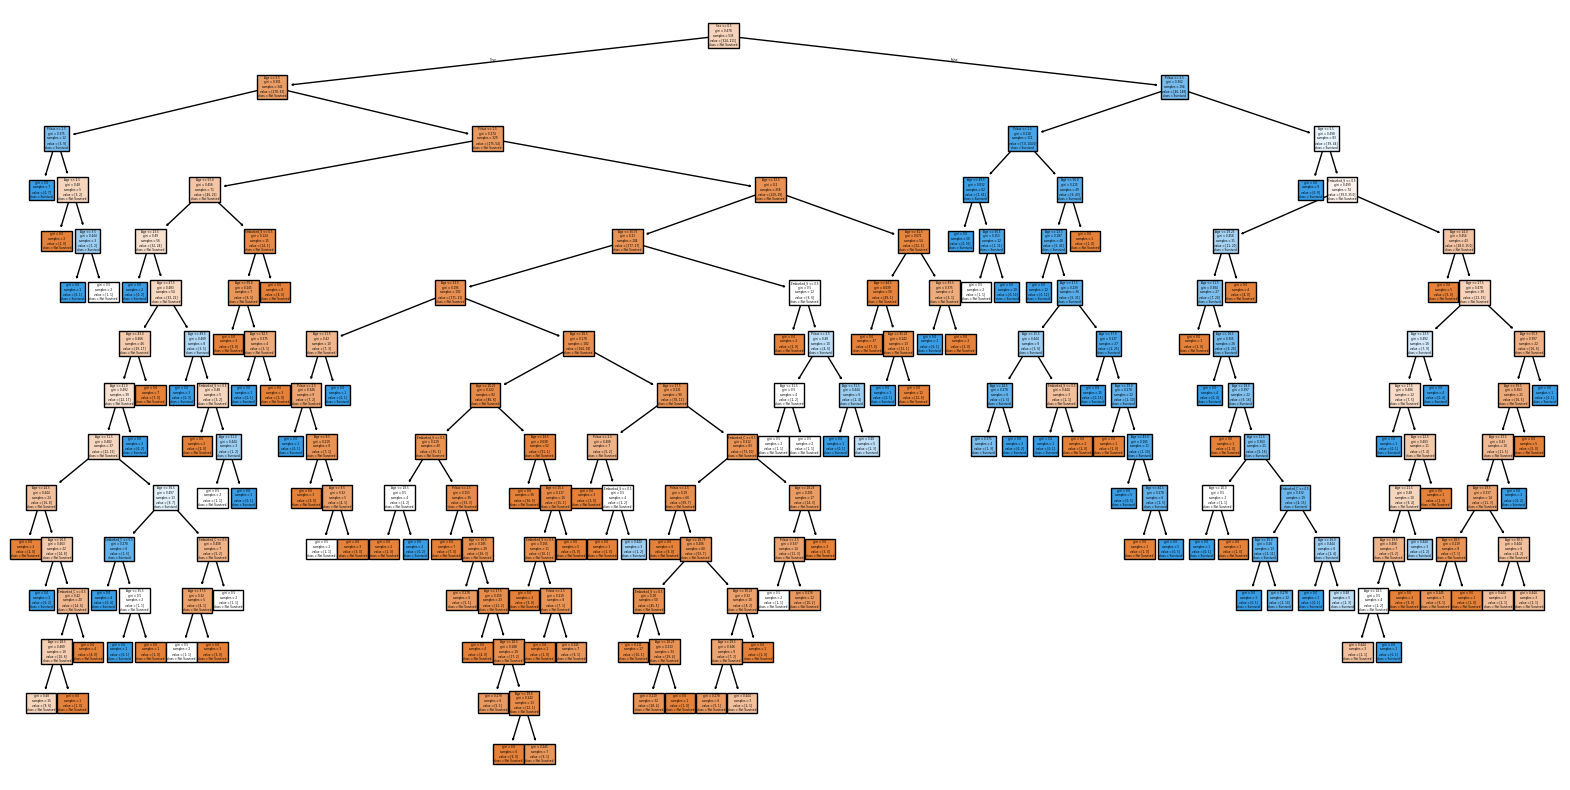

In [129]:
# Escriba código para visualizar el árbol generado
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_titanic.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

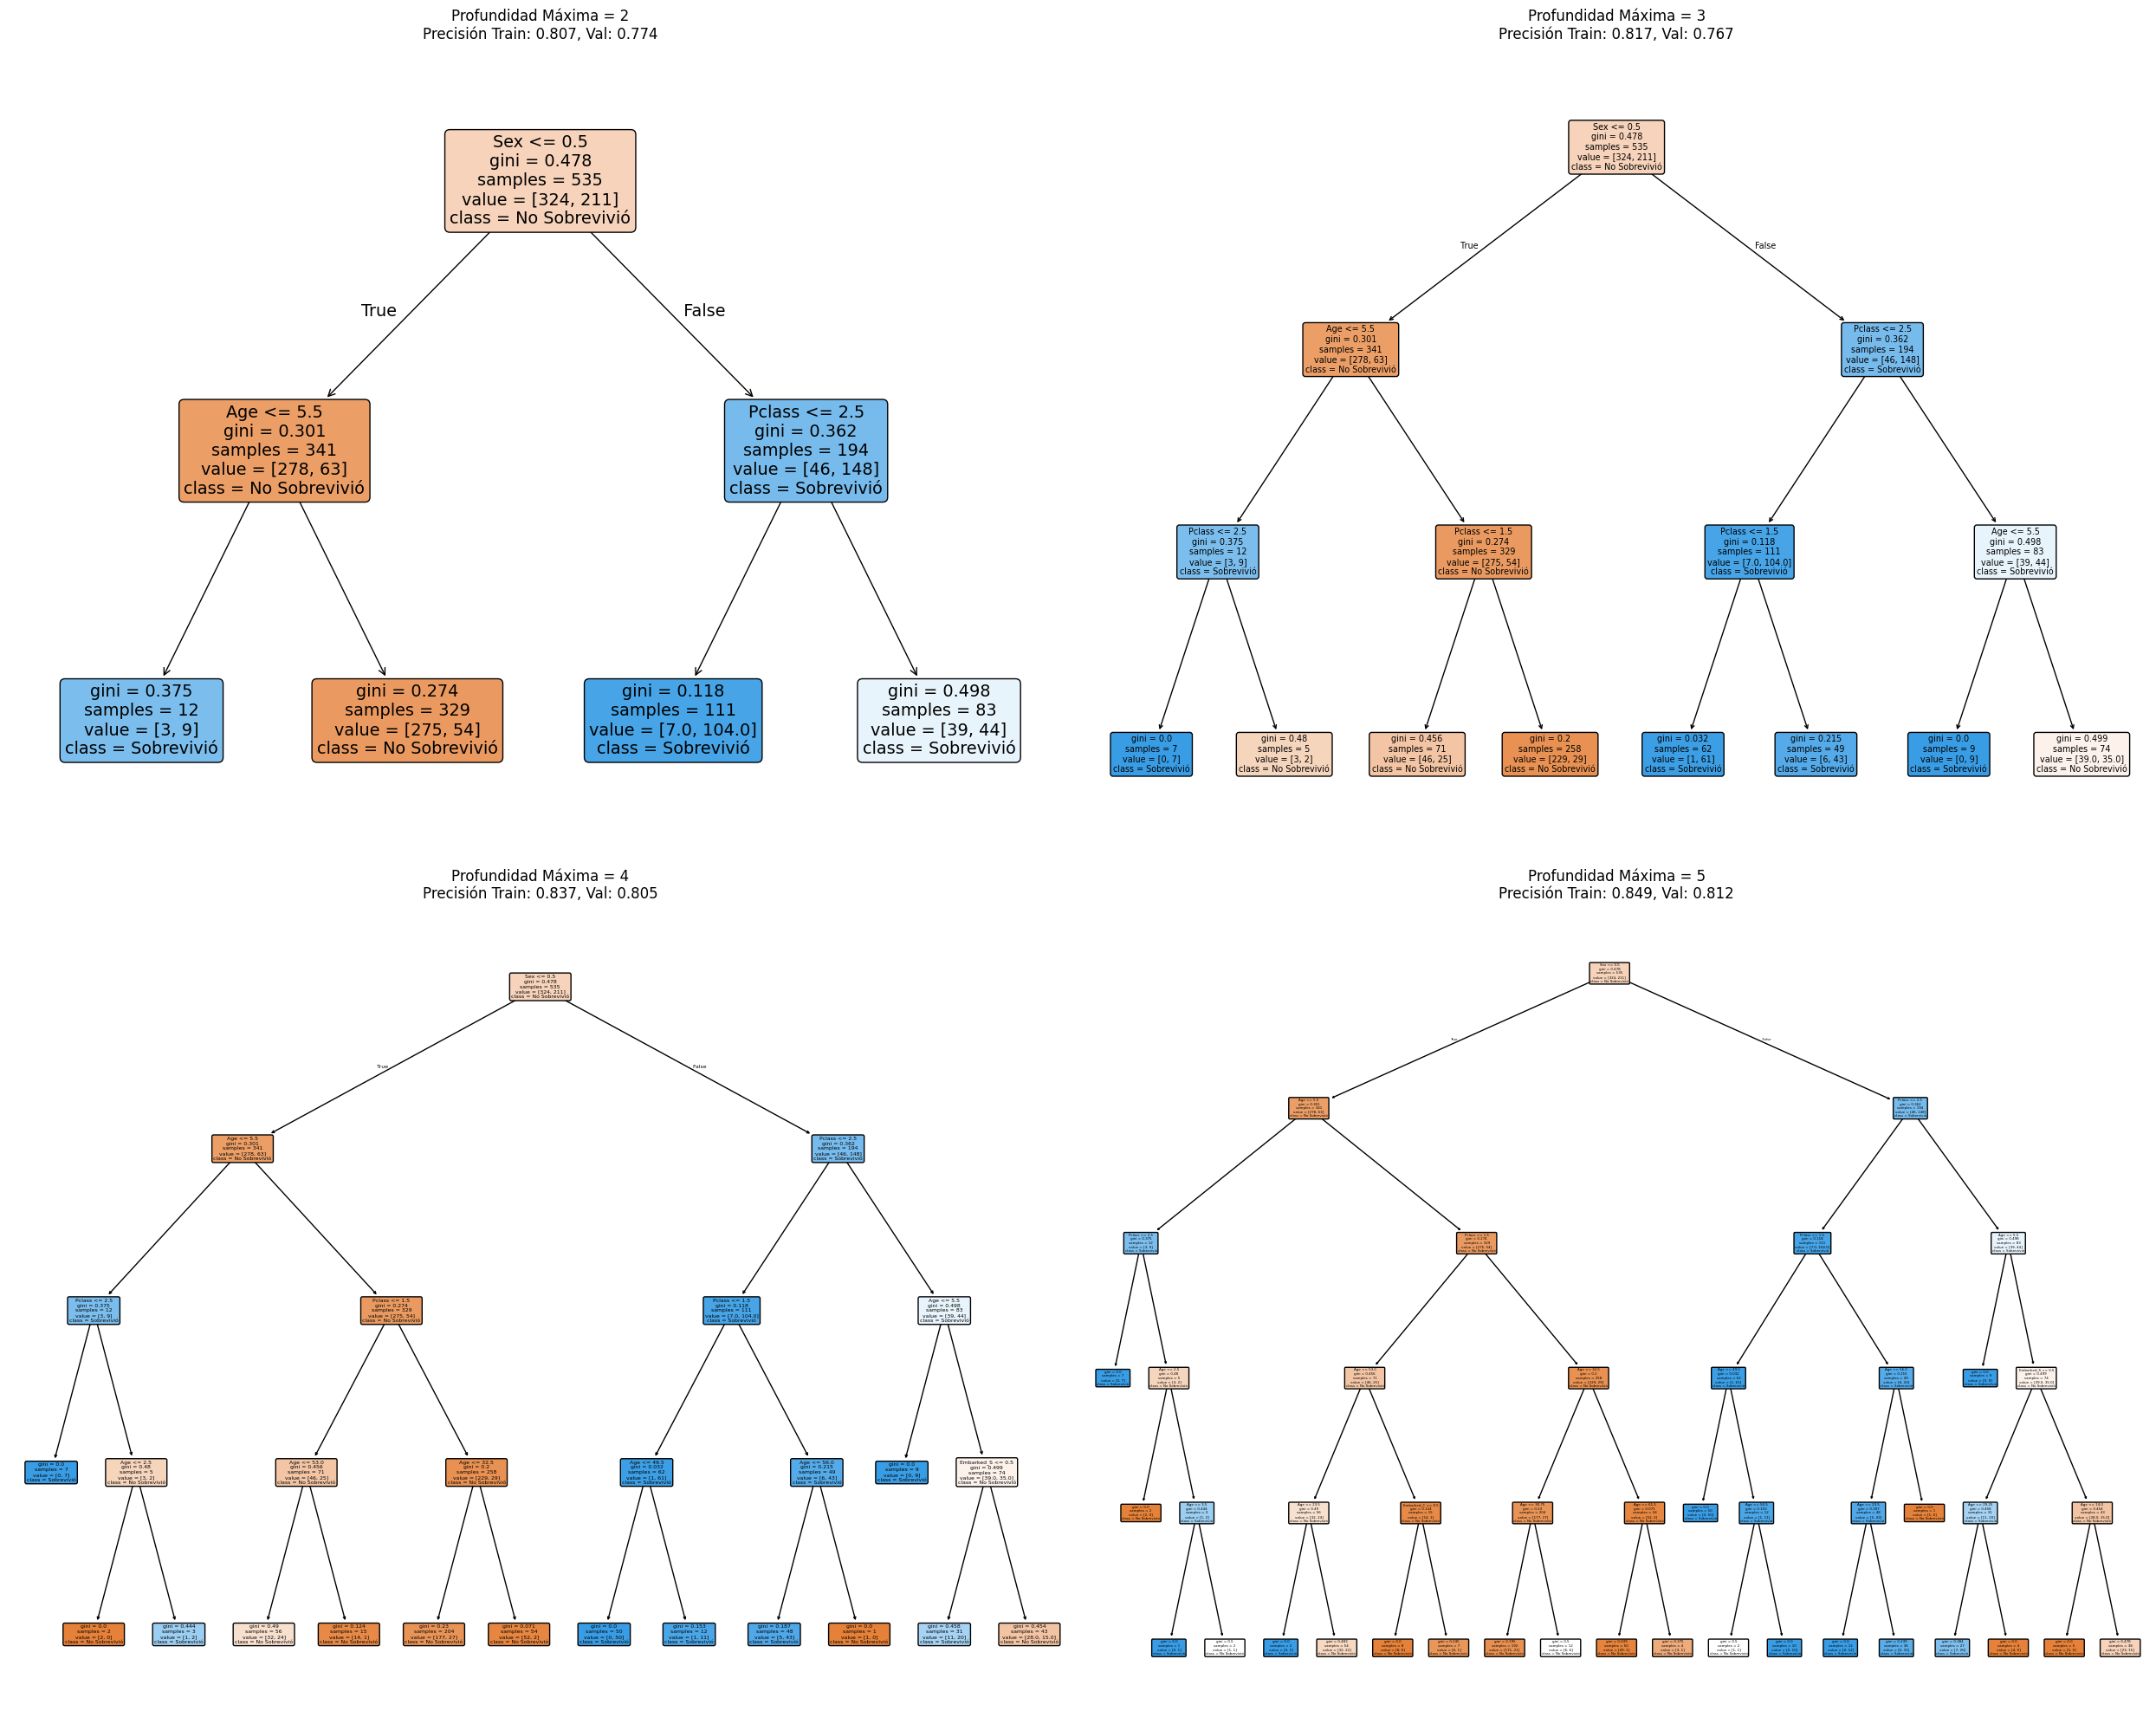

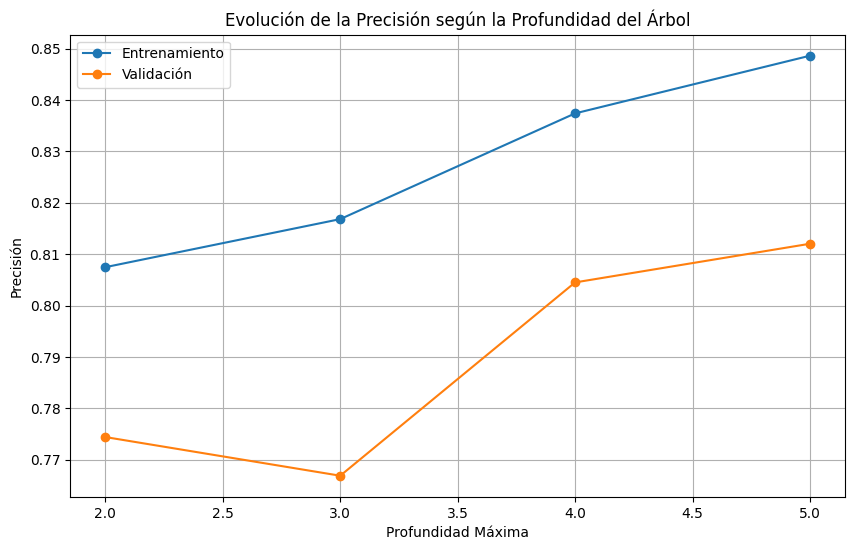


Importancia de las características para el mejor modelo (profundidad 5):
  Característica  Importancia
1            Sex     0.583043
2            Age     0.218384
0         Pclass     0.175185
4     Embarked_S     0.022314
3     Embarked_C     0.001075


In [130]:
# Repita el proceso de entrenamiento y visualización cambiando el parámetro
# max_depth del árbol, así:

# dt_classifier = DecisionTreeClassifier(random_state=42, max_depth = ...)

# Discuta las diferencias encontradas

# Creamos una figura con subplots para comparar diferentes profundidades
fig, axes = plt.subplots(2, 2, figsize=(25, 20))
max_depths = [2, 3, 4, 5]
scores_train = []
scores_val = []

for i, depth in enumerate(max_depths):
    # Creamos y entrenamos el árbol con las profundidades específicadas
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt.fit(X_titanic_train, y_titanic_train)

    # Calculamos la precisión en entrenamiento y validación
    train_score = dt.score(X_titanic_train, y_titanic_train)
    val_score = dt.score(X_titanic_val, y_titanic_val)
    scores_train.append(train_score)
    scores_val.append(val_score)

    # Visualizamos el árbol
    row = i // 2
    col = i % 2
    plot_tree(dt,
              feature_names=X_titanic.columns,
              class_names=['No Sobrevivió', 'Sobrevivió'],
              filled=True,
              rounded=True,
              ax=axes[row, col])
    axes[row, col].set_title(f'Profundidad Máxima = {depth}\nPrecisión Train: {train_score:.3f}, Val: {val_score:.3f}')

plt.tight_layout()
plt.show()

# Visualizamos la evolución de la precisión
plt.figure(figsize=(10, 6))
plt.plot(max_depths, scores_train, 'o-', label='Entrenamiento')
plt.plot(max_depths, scores_val, 'o-', label='Validación')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión según la Profundidad del Árbol')
plt.grid(True)
plt.legend()
plt.show()

# Imprimimos la importancia de las características para el mejor modelo
best_depth = max_depths[np.argmax(scores_val)]
best_dt = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
best_dt.fit(X_titanic_train, y_titanic_train)

importancia = pd.DataFrame({
    'Característica': X_titanic.columns,
    'Importancia': best_dt.feature_importances_
})
print("\nImportancia de las características para el mejor modelo (profundidad {}):"
      .format(best_depth))
print(importancia.sort_values('Importancia', ascending=False))

* El análisis del modelo nos indica que la variable más determinante para la supervivencia en el Titanic es el sexo (Sex), seguida por la clase del pasajero (Pclass), lo cual se evidencia en su posición consistente en los niveles superiores de todos los árboles. Esto sugiere que estas características fueron factores cruciales que influyeron de gran manera en las posibilidades de supervivencia durante el desastre.

* Es importante mencionar también que la edad (Age) aparece reiteradamente en los niveles intermedios del árbol, sugiriendo que su influencia en la supervivencia está moderada por las variables principales de sexo y clase.

* Al examinar la evolución de la precisión según la profundidad del árbol, se observa que mientras la precisión en el conjunto de entrenamiento aumenta constantemente (de 0.807 a 0.849), la precisión en validación muestra un comportamiento más irregular. La diferencia entre ambas métricas se amplía conforme aumenta la profundidad, lo que indica un potencial sobreajuste en los modelos más complejos. Sin embargo, es notable que hasta la profundidad 4, esta diferencia se mantiene en niveles aceptables.

* El punto óptimo del modelo parece encontrarse en la profundidad 4, donde se alcanza un equilibrio favorable entre la capacidad predictiva y la complejidad del modelo, ya que en este punto, la precisión de validación (0.805) es mejor que en profundidades menores, y si se aumenta a profundidad 5 el aporte es muy pequeño en relación al costo de una mayor complejidad.

* La interpretabilidad del modelo también juega un papel importante, pues los árboles con profundidad 2 y 3, aunque más simples y fáciles de interpretar, no capturan completamente la complejidad de los patrones y la información de los datos. Por otro lado, el árbol de profundidad 4 logra un mejor balance de la información.


## Problema 4 - Logistic Regression

Implemente el algoritmo de _Gradient Descent_ para obtener los parámetros de un modelo de regresión logística para la clasificación de la etiqueta $y$ a partir de las características $x$.

a) Implemente una función para medir el _Log Loss_ (LL) de un par de vectores $y \in \{0,1\}$ y $\hat{y} \in \{0,1\}$.

In [131]:
# En esta version del Log Loss, divida entre el total de datos (tome la media).
# La función np.log() calcula el logaritmo natural de su argumento.
def ll(y, yp):
    """
    Calcula el Log Loss (pérdida logarítmica) entre las etiquetas reales y las predicciones.

    Parámetros:
    y: array de etiquetas reales (valores 0 o 1)
    yp: array de probabilidades predichas (valores entre 0 y 1)

    Retorna:
    float: valor promedio del Log Loss
    """
    n = len(y)
    # Agregamos un pequeño epsilon para evitar log(0)
    epsilon = 1e-15

    # Aplicamos un rango para asegurarnos que las probabilidades estén en [epsilon, 1-epsilon]
    yp = np.clip(yp, epsilon, 1 - epsilon)

    # Calculamos el Log Loss para cada muestra
    losses = -(y * np.log(yp) + (1 - y) * np.log(1 - yp))

    # Retornamos el promedio
    return np.mean(losses)


b) Implemente una clase para modelo de Regresion Logística. Este debe incluir:
*   Un método `predict` que se encargue de realizar predicciones basado en los parámetros guardados. Es decir, que calcule el valor de $\hat{y}$ dado el valor de las características $x$ y los parámetros $b$ y $w$, y el valor del umbral $u$ según el modelo:
$$\hat{y} = \frac{1}{1 + exp(-(b + w\cdot x))}$$
*   Un método `classify` que dados los $\hat{y}$ en el intervalo $[0,1]$, los convierta en las predicciones correspondientes según el umbral $u$.
*   Un método `gradient` para para calcular la derivada del LL con respecto a $b$ y $w$. La función debe devolver una tupla $(gb, gw)$ dónde $gb$ es un escalar y $gw$ es un vector de la misma dimensión que $w$.
*   Un método `train` que datos los datos determine los parámetros óptimos $b$ y $w$, utilizando _Gradient Descent_ de tal manera que dadas las características $X \in \mathbb{R}^{n \times m}$ y las etiquetas $y \in \mathbb{R}^n$, devuelva los parámetros $b \in \mathbb{R}$ y $w \in \mathbb{R}^m$. Adicionalmente, incluya los parámetros:
  *   $alpha \in \mathbb{R}$: velocidad de aprendizaje
  *   $eps$: si la diferencia entre los errores de dos iteraciones contiguas es menor a este valor, el proceso se detiene aún si quedan iteraciones. El valor por defecto es None que indica que no aplica este criterio.
  *   $maxIter$: número máximo de iteraciones a realizar

In [132]:
# La implementación de este modelo es casi idéntica a la de la regresión
# lineal. En este caso hemos agrupado las funciones en una clase para
# mantener una estructura más cohesiva.

class LogisticRegression:
    def __init__(self):
        """Inicializa los parámetros del modelo"""
        self.b = 0
        self.w = 0

    def predict(self, X, b=None, w=None):
        """
        Realiza predicciones usando la función sigmoide.

        Parámetros:
        X: matriz de características (n_muestras × n_características)
        b: intercepto (opcional)
        w: vector de pesos (opcional)

        Retorna:
        Array con las probabilidades predichas
        """
        # Usamos parámetros del modelo
        if b is None:
            b = self.b
        if w is None:
            w = self.w

        # Validamos las dimensiones
        if X.shape[1] != len(w):
            raise RuntimeError('El número de parámetros no coincide con las dimensiones de la matriz')

        # Calculamos la función sigmoide: 1 / (1 + exp(-z))
        z = b + np.dot(X, w)
        return 1 / (1 + np.exp(-z))

    def classify(self, yp, u=0.5):
        """
        Convierte probabilidades en predicciones binarias según el umbral.

        Parámetros:
        yp: array de probabilidades predichas
        u: umbral de clasificación (default: 0.5)

        Retorna:
        Array con predicciones binarias (0 o 1)
        """
        if u < 0 or u > 1:
            raise RuntimeError('El umbral debe estar en el intervalo [0, 1]')

        return (yp >= u).astype(int)

    def gradient(self, X, y, b, w):
        """
        Calcula el gradiente del Log Loss respecto a b y w.

        Parámetros:
        X: matriz de características
        y: vector de etiquetas reales
        b: intercepto actual
        w: vector de pesos actual

        Retorna:
        Tupla (gb, gw) con los gradientes
        """
        # Calculamos las predicciones actuales
        yp = self.predict(X, b, w)

        # Calculamos el error
        error = yp - y

        # Convertimos X y error a NumPy arrays
        X_np = X.to_numpy()  # Convertimos X a NumPy array
        error_np = error.to_numpy()  # Convertimos error a un NumPy array

        # Gradiente para b (escalar)
        gb = np.mean(error_np)

        # Gradiente para w (vector)
        gw = np.mean(X_np * error_np[:, np.newaxis], axis=0)

        return (gb, gw)

    def train(self, X, y, alpha=0.00001, eps=None, maxIter=100):
        """
        Entrena el modelo usando descenso del gradiente.

        Parámetros:
        X: matriz de características
        y: vector de etiquetas
        alpha: tasa de aprendizaje
        eps: tolerancia para convergencia (opcional)
        maxIter: número máximo de iteraciones
        """
        # Inicializamos los parámetros
        b = 0
        w = np.zeros(X.shape[1])

        prev_loss = float('inf')

        for iteration in range(maxIter):
            # Calculamos las predicciones y pérdida actual
            predictions = self.predict(X, b, w)
            current_loss = ll(y, predictions)

            # Verificamos el criterio de parada por eps
            if eps is not None:
                loss_diff = abs(prev_loss - current_loss)
                if loss_diff < eps:
                    break

            # Calculamos los gradientes
            gb, gw = self.gradient(X, y, b, w)

            # Actualizamos los parámetros
            b = b - alpha * gb
            w = w - alpha * gw

            prev_loss = current_loss

        # Guardamos los parámetros optimizados
        self.b = b
        self.w = w

In [133]:
# Creamos una instancia del regresor logístico
from sklearn.linear_model import LogisticRegression
logreg_titanic = LogisticRegression()
# entrenamos el modelo
logreg_titanic.fit(X_titanic_train, y_titanic_train)
# Realizamos las predicciones
y_pred_lr1 = logreg_titanic.predict(X_titanic_train)
# convertimos las predicciones de [0,1] a los valores 0 o 1
y_pred_lr1 = (y_pred_lr1 >= 0.5).astype(int)

## Problema 5 - Implementaciones de paquete de software
En esta tarea hemos implementado el modelo regresión logística para profundizar en su funcionamiento. Sin embargo, en la práctica, rara vez nos ocupamos de la implementación, ya que estas están disponibles en paquetes de software.

En este problema, usted deberá entrenar un modelo de regresión logística utilizando Scikit learn.

In [134]:
# Importar las bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicializar y entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Completar pasando nuestros datos de entrenamiento
log_reg.fit(X_titanic_train, y_titanic_train)

# Completar pasando los datos de entrenamiento
y_pred_lr2 = log_reg.predict(X_titanic_train)

## Problema 6 - Evaluación

Una vez hemos entrenado los modelos podemos evaluarlos.

Para esto, primero vamos a calcular la matriz de confusión y posteriormente la exactitud, precisión y sensibilidad (exhaustividad).

In [135]:
# Implementar una función para obtener la matriz de confusión

def confusion_matrix(y, yp):
    # Usamos contadores
    VP = FP = FN = VN = 0

    # Iteramos
    for true, pred in zip(y, yp):
        if true == 1 and pred == 1:  # Verdadero Positivo
            VP += 1
        elif true == 0 and pred == 1:  # Falso Positivo
            FP += 1
        elif true == 1 and pred == 0:  # Falso Negativo
            FN += 1
        elif true == 0 and pred == 0:  # Verdadero Negativo
            VN += 1

    return [[VP, FP], [FN, VN]]


In [136]:
def exactitud(mat_conf):
    VP, FP = mat_conf[0][0], mat_conf[0][1]  # Verdaderos Positivos, Falsos Positivos
    FN, VN = mat_conf[1][0], mat_conf[1][1]  # Falsos Negativos, Verdaderos Negativos
    total = VP + FP + FN + VN
    if total == 0:  # Para evitar división por cero
        return 0
    return (VP + VN) / total

def precision(mat_conf):
    VP, FP = mat_conf[0][0], mat_conf[0][1]  # Verdaderos Positivos, Falsos Positivos
    if (VP + FP) == 0:  # Para evitar división por cero
        return 0
    return VP / (VP + FP)

def sensibilidad(mat_conf):
    VP, FN = mat_conf[0][0], mat_conf[1][0]  # Verdaderos Positivos, Falsos Negativos
    if (VP + FN) == 0:  # Para evitar división por cero
        return 0
    return VP / (VP + FN)

In [137]:
def evaluate_prediction(y, yp):
  conf_matrix = confusion_matrix(y, yp)
  print("Confusion matrix \n", conf_matrix)
  print("Exactitud: ", exactitud(conf_matrix))
  print("Precision: ", precision(conf_matrix))
  print("Sensibilidad: ", sensibilidad(conf_matrix))

In [138]:
# evaluate the model in training
print("Rendimiento del modelo para datos de entrenamiento: \n")

print("Árbol de decisiones:")
evaluate_prediction(y_titanic_train, y_pred_dt)
print(" ")
print("Regresión Logística (implementado):")
evaluate_prediction(y_titanic_train, y_pred_lr1)
print(" ")
print("Regresión Logística (Scikit learn):")
evaluate_prediction(y_titanic_train, y_pred_lr2)


Rendimiento del modelo para datos de entrenamiento: 

Árbol de decisiones:
Confusion matrix 
 [[179, 9], [32, 315]]
Exactitud:  0.9233644859813084
Precision:  0.9521276595744681
Sensibilidad:  0.8483412322274881
 
Regresión Logística (implementado):
Confusion matrix 
 [[159, 54], [52, 270]]
Exactitud:  0.8018691588785046
Precision:  0.7464788732394366
Sensibilidad:  0.7535545023696683
 
Regresión Logística (Scikit learn):
Confusion matrix 
 [[159, 54], [52, 270]]
Exactitud:  0.8018691588785046
Precision:  0.7464788732394366
Sensibilidad:  0.7535545023696683


In [139]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_metrics(y_true, y_pred_dt, y_pred_lr1, y_pred_lr2):

  # Calcula las métricas para cada modelo
  metrics_dt = [exactitud(confusion_matrix(y_true, y_pred_dt)),
                precision(confusion_matrix(y_true, y_pred_dt)),
                sensibilidad(confusion_matrix(y_true, y_pred_dt))]

  metrics_lr1 = [exactitud(confusion_matrix(y_true, y_pred_lr1)),
                 precision(confusion_matrix(y_true, y_pred_lr1)),
                 sensibilidad(confusion_matrix(y_true, y_pred_lr1))]

  metrics_lr2 = [exactitud(confusion_matrix(y_true, y_pred_lr2)),
                 precision(confusion_matrix(y_true, y_pred_lr2)),
                 sensibilidad(confusion_matrix(y_true, y_pred_lr2))]

  fig = make_subplots(rows=1, cols=3, subplot_titles=("Exactitud", "Precisión", "Sensibilidad"))

  fig.add_trace(go.Bar(x=['Árbol de Decisión', 'LR (Implementado)', 'LR (Scikit-learn)'],
                      y=[metrics_dt[0], metrics_lr1[0], metrics_lr2[0]], name='Exactitud'), row=1, col=1)

  fig.add_trace(go.Bar(x=['Árbol de Decisión', 'LR (Implementado)', 'LR (Scikit-learn)'],
                      y=[metrics_dt[1], metrics_lr1[1], metrics_lr2[1]], name='Precisión'), row=1, col=2)

  fig.add_trace(go.Bar(x=['Árbol de Decisión', 'LR (Implementado)', 'LR (Scikit-learn)'],
                      y=[metrics_dt[2], metrics_lr1[2], metrics_lr2[2]], name='Sensibilidad'), row=1, col=3)

  fig.update_layout(title_text="Comparación de Métricas de Modelos", barmode='group')
  fig.show()

plot_metrics(y_titanic_train, y_pred_dt, y_pred_lr1, y_pred_lr2)

Rendimiento del modelo para datos de entrenamiento:
Árbol de decisiones:


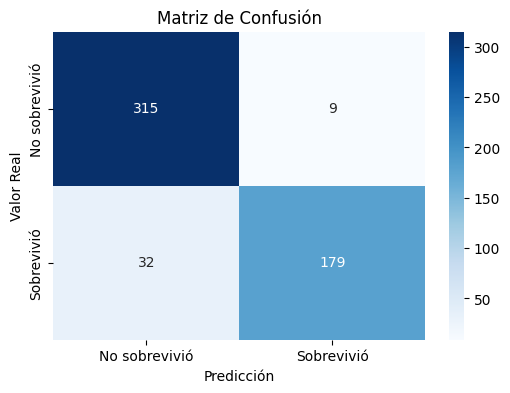

 
Regresión Logística (implementado):


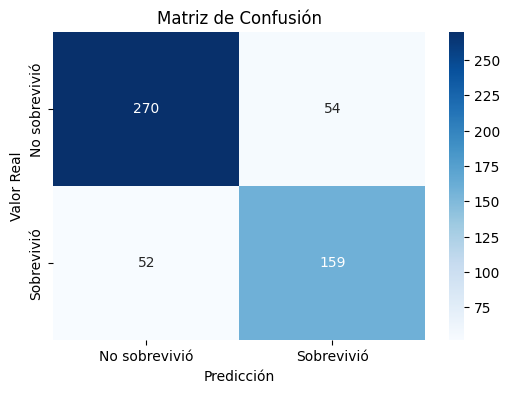

 
Regresión Logística (Scikit learn):


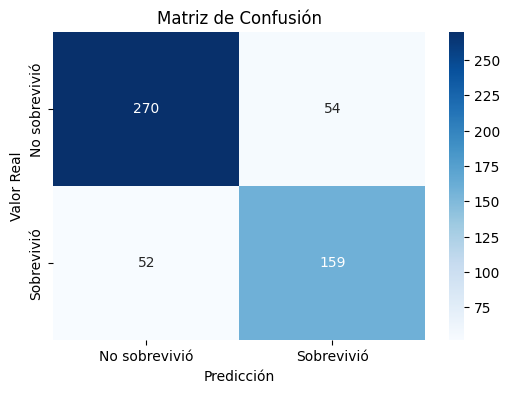

In [140]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_prediction(y, yp):
  cm = confusion_matrix(y, yp)
  labels = ['No sobrevivió', 'Sobrevivió']  # Etiquetas para la matriz de confusión

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.title('Matriz de Confusión')
  plt.show()

print("Rendimiento del modelo para datos de entrenamiento:")

print("Árbol de decisiones:")
evaluate_prediction(y_titanic_train, y_pred_dt)
print(" ")
print("Regresión Logística (implementado):")
evaluate_prediction(y_titanic_train, y_pred_lr1)
print(" ")
print("Regresión Logística (Scikit learn):")
evaluate_prediction(y_titanic_train, y_pred_lr2)

Rendimiento del modelo para datos de entrenamiento:
Árbol de decisiones:


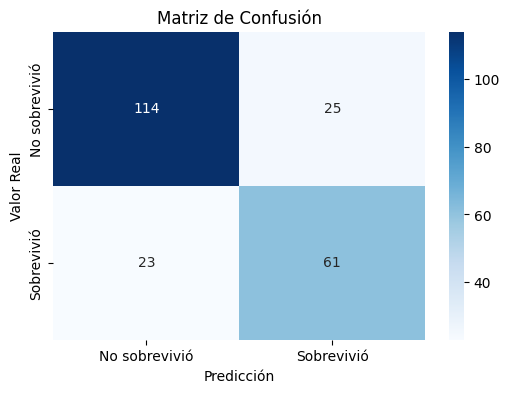

 
Regresión Logística (implementado):


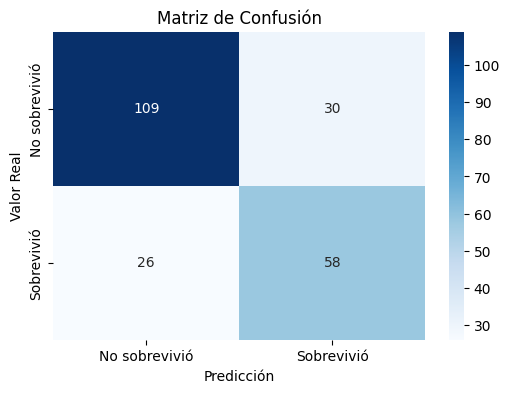

 
Regresión Logística (Scikit learn):


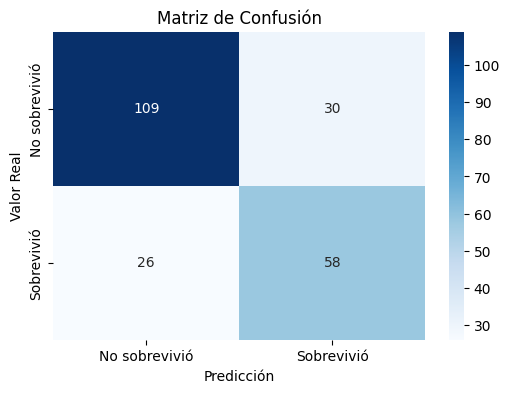

In [141]:
# Escriba código para evaluar los modelos nuevamente, esta vez con los datos
#de prueba, en lugar de los datos de entrenamiento

# Evaluar el rendimiento del modelo en datos de prueba
print("Rendimiento del modelo para datos de entrenamiento:")

print("Árbol de decisiones:")
y_pred_dt_test = dt_classifier.predict(X_titanic_test)
evaluate_prediction(y_titanic_test, y_pred_dt_test)
print(" ")
print("Regresión Logística (implementado):")
y_pred_lr1_test = logreg_titanic.predict(X_titanic_test) # Use predict to get predictions
evaluate_prediction(y_titanic_test, y_pred_lr1_test)
print(" ")
print("Regresión Logística (Scikit learn):")
y_pred_lr2_test = log_reg.predict(X_titanic_test)
evaluate_prediction(y_titanic_test, y_pred_lr2_test)


In [142]:

def plot_metrics(y_true, y_pred_dt, y_pred_lr1, y_pred_lr2):


  # Calculate the metrics for each model
  metrics_dt = [exactitud(confusion_matrix(y_true, y_pred_dt)),
                precision(confusion_matrix(y_true, y_pred_dt)),
                sensibilidad(confusion_matrix(y_true, y_pred_dt))]

  metrics_lr1 = [exactitud(confusion_matrix(y_true, y_pred_lr1)),
                 precision(confusion_matrix(y_true, y_pred_lr1)),
                 sensibilidad(confusion_matrix(y_true, y_pred_lr1))]

  metrics_lr2 = [exactitud(confusion_matrix(y_true, y_pred_lr2)),
                 precision(confusion_matrix(y_true, y_pred_lr2)),
                 sensibilidad(confusion_matrix(y_true, y_pred_lr2))]

  fig = make_subplots(rows=1, cols=3, subplot_titles=("Exactitud", "Precisión", "Sensibilidad"))

  fig.add_trace(go.Bar(x=['Árbol de Decisión', 'LR (Implementado)', 'LR (Scikit-learn)'],
                      y=[metrics_dt[0], metrics_lr1[0], metrics_lr2[0]], name='Exactitud'), row=1, col=1)

  fig.add_trace(go.Bar(x=['Árbol de Decisión', 'LR (Implementado)', 'LR (Scikit-learn)'],
                      y=[metrics_dt[1], metrics_lr1[1], metrics_lr2[1]], name='Precisión'), row=1, col=2)

  fig.add_trace(go.Bar(x=['Árbol de Decisión', 'LR (Implementado)', 'LR (Scikit-learn)'],
                      y=[metrics_dt[2], metrics_lr1[2], metrics_lr2[2]], name='Sensibilidad'), row=1, col=3)

  fig.update_layout(title_text="Comparación de Métricas de Modelos", barmode='group')
  fig.show()

plot_metrics(y_titanic_test, y_pred_dt_test, y_pred_lr1_test, y_pred_lr2_test)

Escriba aquí sus conclusiones con respecto a los modelos entrenados. En particular, mencione los siguientes aspectos y justifique sus conclusiones al respecto:


*   ¿Qué modelo tiene un mejor desempeño para este problema?
*   ¿Alguno de los modelos parece sobreajustado?
*   ¿Cómo se compara su implementación de regresión logística con la de Scikit learn en términos de desempeño?


**¿Qué modelo tiene un mejor desempeño para este problema?**

Considerando las métricas de exactitud, precisión y sensibilidad (exhaustividad) obtenidas en los datos de prueba, el modelo de Regresión Logística implementado con Scikit-learn presenta un desempeño ligeramente superior en comparación con el modelo de Árbol de Decisión y la Regresión Logística implementada manualmente.

* La Regresión Logística muestra un desempeño más estable y consistente entre los conjuntos de validación y prueba. Los resultados sugieren una precisión alrededor del 74-79% en ambos conjuntos.

* El Árbol de Decisión muestra una mayor variabilidad en su desempeño entre los conjuntos de validación y prueba, con tendencia a tener un mejor rendimiento en el conjunto de entrenamiento pero peor generalización.

**¿Alguno de los modelos parece sobreajustado?**

Por lo que se puede observar, podría decirse que el modelo de Árbol de Decisión, especialmente con profundidades mayores a 4, podría presentar indicios de sobreajuste, como se explicó anteriormente. Esto se observa al comparar la precisión en los datos de entrenamiento y validación. Mientras que la precisión en entrenamiento aumenta con la profundidad, la precisión en validación muestra un comportamiento más irregular, lo que nos podría indicar que el modelo se está ajustando demasiado a los datos de entrenamiento y pierde capacidad de generalización.

**¿Cómo se compara su implementación de regresión logística con la de Scikit-learn en términos de desempeño?**

La implementación manual de la Regresión Logística presenta un desempeño muy similar a la implementación de Scikit-learn en términos de exactitud, precisión y sensibilidad. Sin embargo, la implementación de Scikit-learn logra una precisión un poco superior, lo que puede deberse a optimizaciones internas de la librería y a la selección de hiperparámetros más eficientes que realiza este paquete de software.

